# Tratamento de dados

In [1]:
import pandas as pd

C:\Users\victo\AppData\Local\Temp\ipykernel_15524\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
tabela = pd.read_excel("Desafio Inteligência 1.xlsx", sheet_name="Base")
tabela.head()

,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM
0,Loja 11000,2022-12-19,7,1933.88,SITE
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2
4,Loja 31004,2022-05-13,1,202.03,SITE


In [3]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTRATO         54536 non-null  object        
 1   DATA DA CRIACAO  54536 non-null  datetime64[ns]
 2   DIARIAS          54536 non-null  int64         
 3   VALOR TOTAL      54536 non-null  float64       
 4   ORIGEM           54536 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [4]:
tabela.isnull().sum()

CONTRATO           0
DATA DA CRIACAO    0
DIARIAS            0
VALOR TOTAL        0
ORIGEM             0
dtype: int64

In [5]:
tabela["Ticket_Medio"] = tabela["VALOR TOTAL"] / tabela["DIARIAS"]


In [6]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTRATO         54536 non-null  object        
 1   DATA DA CRIACAO  54536 non-null  datetime64[ns]
 2   DIARIAS          54536 non-null  int64         
 3   VALOR TOTAL      54536 non-null  float64       
 4   ORIGEM           54536 non-null  object        
 5   Ticket_Medio     54536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.5+ MB


In [7]:
tabela.head()

,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM,Ticket_Medio
0,Loja 11000,2022-12-19,7,1933.88,SITE,276.268571
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO,187.037500
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1,76.506667
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2,107.976000
4,Loja 31004,2022-05-13,1,202.03,SITE,202.030000


In [8]:
tabela["ANO"] = tabela["DATA DA CRIACAO"].dt.year
tabela["MES"] = tabela["DATA DA CRIACAO"].dt.month
tabela["DIA"] = tabela["DATA DA CRIACAO"].dt.day


In [9]:
tabela.drop(columns=["DATA DA CRIACAO"], inplace=True)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Criar o objeto LabelEncoder
le = LabelEncoder()

# Aplicar nas colunas
tabela["CONTRATO"] = le.fit_transform(tabela["CONTRATO"])
tabela["ORIGEM"] = le.fit_transform(tabela["ORIGEM"])



In [11]:
tabela.info()
tabela.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CONTRATO      54536 non-null  int32  
 1   DIARIAS       54536 non-null  int64  
 2   VALOR TOTAL   54536 non-null  float64
 3   ORIGEM        54536 non-null  int32  
 4   Ticket_Medio  54536 non-null  float64
 5   ANO           54536 non-null  int32  
 6   MES           54536 non-null  int32  
 7   DIA           54536 non-null  int32  
dtypes: float64(2), int32(5), int64(1)
memory usage: 2.3 MB


,CONTRATO,DIARIAS,VALOR TOTAL,ORIGEM,Ticket_Medio,ANO,MES,DIA
0,0,7,1933.88,3,276.268571,2022,12,19
1,24339,4,748.15,0,187.037500,2022,7,28
2,6,6,459.04,1,76.506667,2023,8,20
3,10,10,1079.76,2,107.976000,2022,3,24
4,39068,1,202.03,3,202.030000,2022,5,13


In [12]:
# Criar a matriz de correlação
correlation_matrix = tabela.corr()

# Exibir a tabela de correlação
print(correlation_matrix)


              CONTRATO   DIARIAS  VALOR TOTAL    ORIGEM  Ticket_Medio  \
CONTRATO      1.000000 -0.045890    -0.009995  0.005501      0.078373   
DIARIAS      -0.045890  1.000000     0.753429 -0.006181     -0.170055   
VALOR TOTAL  -0.009995  0.753429     1.000000 -0.001651      0.288664   
ORIGEM        0.005501 -0.006181    -0.001651  1.000000      0.000298   
Ticket_Medio  0.078373 -0.170055     0.288664  0.000298      1.000000   
ANO           0.183256 -0.052883     0.021680 -0.000837      0.117510   
MES           0.024136 -0.020125     0.000993  0.000138      0.040582   
DIA           0.004397 -0.036002    -0.016876  0.000505      0.024289   

                   ANO       MES       DIA  
CONTRATO      0.183256  0.024136  0.004397  
DIARIAS      -0.052883 -0.020125 -0.036002  
VALOR TOTAL   0.021680  0.000993 -0.016876  
ORIGEM       -0.000837  0.000138  0.000505  
Ticket_Medio  0.117510  0.040582  0.024289  
ANO           1.000000 -0.072470  0.007527  
MES          -0.072470  1.0

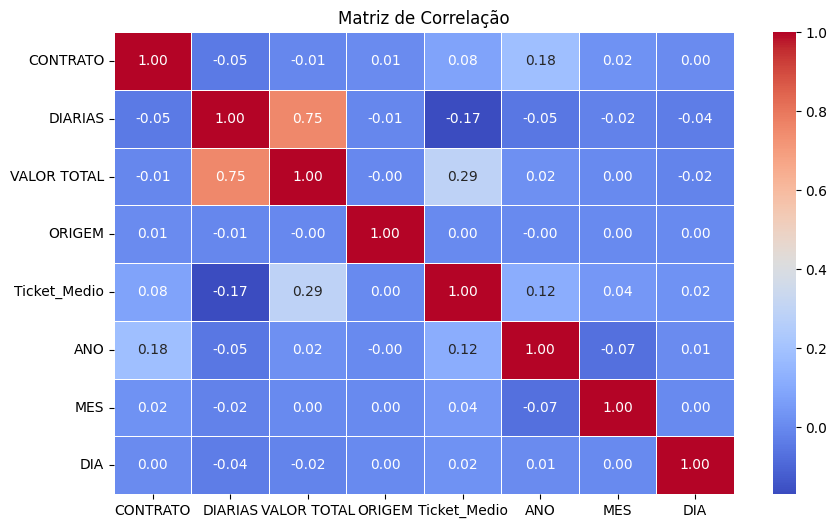

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()


# Criação do modelo

In [13]:
# Features
X = tabela.drop('Ticket_Medio',axis=1)

# Target(alvo)

y = tabela['Ticket_Medio']

In [14]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Definição do modelo XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)

# Validação Cruzada para R²
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Validação Cruzada para MSE
mse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Validação Cruzada para MAE
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Resultados
print(f"Média do R²: {np.mean(r2_scores):.4f}")
print(f"Média do MSE: {-np.mean(mse_scores):.4f}")  # Inverte o sinal do MSE
print(f"Média do MAE: {-np.mean(mae_scores):.4f}")  # Inverte o sinal do MAE

Média do R²: 0.9565
Média do MSE: 482.4400
Média do MAE: 2.3866


In [15]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Definição do modelo
model = xgb.XGBRegressor(objective='reg:squarederror')

# Definição do espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Número de árvores
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Taxa de aprendizado
    'max_depth': [3, 5, 7, 10],  # Profundidade máxima da árvore
    'subsample': [0.6, 0.8, 1.0],  # Porcentagem de amostras usadas por árvore
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fracção de colunas usadas por árvore
}

# Definição do RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,  # Número de combinações aleatórias a testar
    scoring='r2',  # Otimizando para R²
    cv=5,  # Validação cruzada de 5 folds
    verbose=1,
    n_jobs=-1  # Paraleliza o processo
)

# Executar a busca pelos melhores hiperparâmetros
random_search.fit(X, y)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", random_search.best_params_)

# Melhor modelo encontrado
best_model = random_search.best_estimator_

# Avaliação do melhor modelo
r2_best = best_model.score(X, y)
print(f"Melhor R² encontrado: {r2_best:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores hiperparâmetros: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Melhor R² encontrado: 0.9836


Média do R²: 0.9585
Média do MSE: 414.8534
Média do MAE: 5.4825


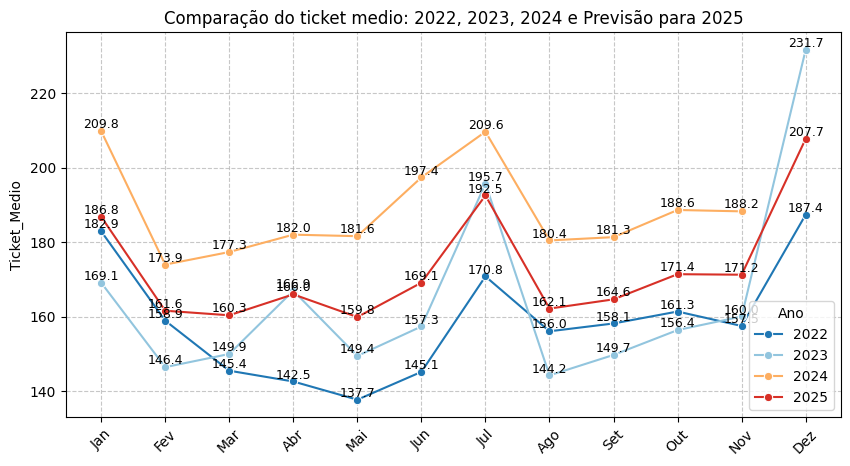

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GroupKFold, cross_val_score

# Criar os DataFrames dos anos anteriores (agora calculando a média por mês)
df_2022 = tabela[tabela['ANO'] == 2022].groupby('MES')['Ticket_Medio'].mean().reset_index()
df_2023 = tabela[tabela['ANO'] == 2023].groupby('MES')['Ticket_Medio'].mean().reset_index()
df_2024 = tabela[tabela['ANO'] == 2024].groupby('MES')['Ticket_Medio'].mean().reset_index()

# Conjunto de dados para previsão de 2025
proximo_ano = tabela['ANO'].max() + 1  # Define o próximo ano (2025)
novo_X = X.copy()
novo_X['ANO'] = proximo_ano  # Define o ano futuro

# Preparando os dados para o modelo
X = tabela.drop(columns=['Ticket_Medio'])  
y = tabela['Ticket_Medio']
groups = tabela['ANO']  # Usando o 'ANO' como grupo para o GroupKFold

# Definindo o modelo XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,         # Ajuste para 100 estimadores
    learning_rate=0.1,        # Ajuste para a taxa de aprendizado
    max_depth=3,              # Ajuste para a profundidade máxima da árvore
    subsample=0.6,            # Ajuste para usar 60% das amostras
    colsample_bytree=1.0      # Ajuste para 100% das features em cada árvore
)

# Definindo o GroupKFold com 3 divisões
gkf = GroupKFold(n_splits=3)

# Validação cruzada para o modelo com GroupKFold
cv_scores_r2 = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='r2')
cv_scores_mse = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(model, X, y, cv=gkf.split(X, y, groups), scoring='neg_mean_absolute_error')

# Resultados da validação cruzada
print(f"Média do R²: {np.mean(cv_scores_r2):.4f}")
print(f"Média do MSE: {-np.mean(cv_scores_mse):.4f}")  # Inverte o sinal do MSE
print(f"Média do MAE: {-np.mean(cv_scores_mae):.4f}")  # Inverte o sinal do MAE

# Treinando o modelo com a validação cruzada aplicada
model.fit(X, y)

# Prevendo para o próximo ano (2025) usando o modelo treinado
y_pred_2025 = model.predict(novo_X)

# Criando o DataFrame de previsão para 2025
df_2025 = pd.DataFrame({'MES': novo_X['MES'], 'Ticket_Medio': y_pred_2025})
df_2025 = df_2025.groupby('MES')['Ticket_Medio'].mean().reset_index()  # Usando a média de Ticket_Medio por mês

# Adicionando a coluna de ano para cada DataFrame
df_2022['ANO'] = 2022
df_2023['ANO'] = 2023
df_2024['ANO'] = 2024
df_2025['ANO'] = 2025

# Concatenando os DataFrames
df_final = pd.concat([df_2022, df_2023, df_2024, df_2025])

# Mapeamento dos meses para nomes abreviados
meses_abrev = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
               7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
df_final['MES'] = df_final['MES'].map(meses_abrev)

# Definindo a paleta de cores em tons de azul
paleta_azul = {2022: "#1f77b4", 2023: "#92c5de", 2024: "#fdae61", 2025: "#d73027"}  # Tons de azul

# Criar o gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_final, x='MES', y='Ticket_Medio', hue='ANO', marker='o', palette=paleta_azul)

# Adicionar os valores em cima de cada ponto
for year in df_final['ANO'].unique():
    for i in range(len(df_final[df_final['ANO'] == year])):
        row = df_final[df_final['ANO'] == year].iloc[i]
        plt.text(row['MES'], row['Ticket_Medio'], f'{row["Ticket_Medio"]:.1f}', 
                 ha='center', va='bottom', fontsize=9)

# Ajustes do gráfico
plt.xlabel('')
plt.ylabel('Ticket_Medio')
plt.title(f'Comparação do ticket medio: 2022, 2023, 2024 e Previsão para {proximo_ano}')
plt.xticks(rotation=45)  # Rotacionar os meses para melhor legibilidade
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Ano')

# Exibir o gráfico
plt.show()


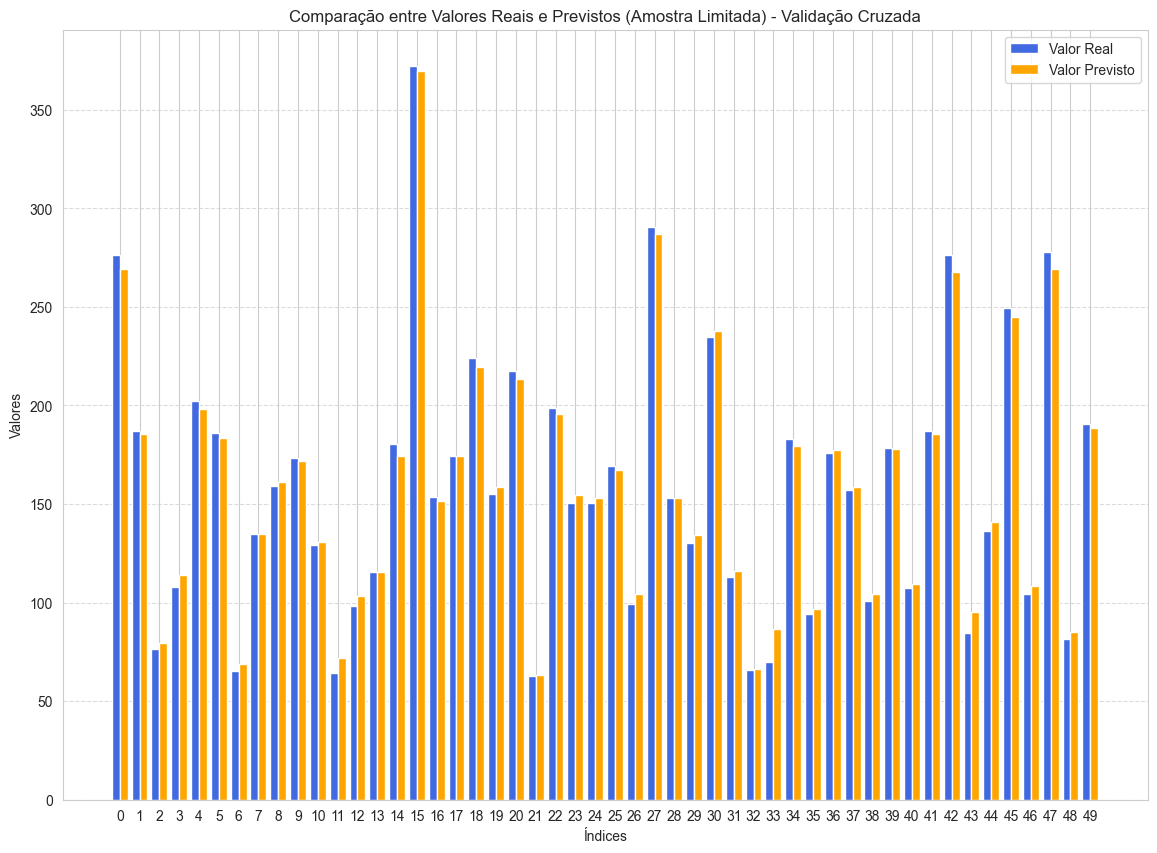

In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Definição do modelo XGBoost Regressor com hiperparâmetros otimizados
model = xgb.XGBRegressor(
    n_estimators=100,         # Ajuste para 100 estimadores
    learning_rate=0.1,        # Ajuste para a taxa de aprendizado
    max_depth=3,              # Ajuste para a profundidade máxima da árvore
    subsample=1.0,            # Ajuste para usar 100% das amostras
    colsample_bytree=1.0      # Ajuste para 100% das features em cada árvore
)

# Validação Cruzada (gera previsões para cada amostra)
y_predict = cross_val_predict(model, X, y, cv=10)

# Define a quantidade de amostras a serem exibidas no gráfico
n_amostra = 50  
y_test_amostra = y.iloc[:n_amostra]  # Valores reais
y_predict_amostra = y_predict[:n_amostra]  # Valores previstos

# Criação do índice das barras
indices = np.arange(len(y_test_amostra))
largura_barra = 0.4  # Largura das barras

plt.figure(figsize=(14, 10))

# Gráfico de barras comparando valores reais e previstos
plt.bar(indices - largura_barra/2, y_test_amostra, width=largura_barra, label='Valor Real', color='royalblue')
plt.bar(indices + largura_barra/2, y_predict_amostra, width=largura_barra, label='Valor Previsto', color='orange')

# Personalizações
plt.legend()
plt.xlabel('Índices')
plt.ylabel('Valores')
plt.title('Comparação entre Valores Reais e Previstos (Amostra Limitada) - Validação Cruzada')
plt.xticks(indices)  # Define os índices no eixo X
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibe o gráfico
plt.show()


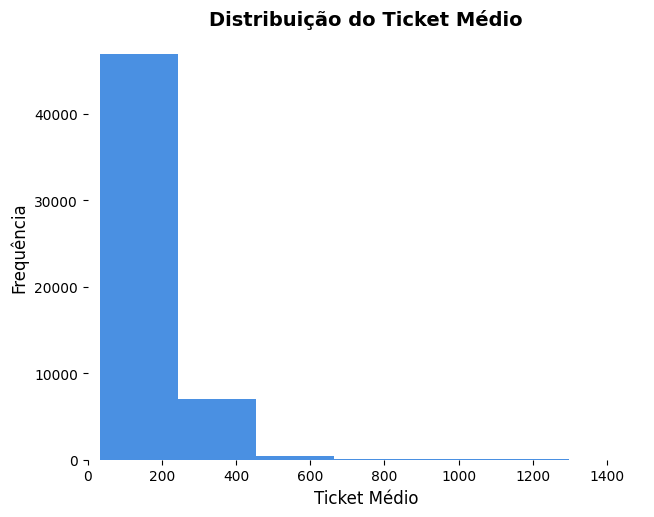

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Criar o histograma sem contorno preto nas barras
plt.hist(tabela['Ticket_Medio'], bins=20, color='#4A90E2')  

# Ajustar os limites do eixo X
plt.xlim(0, 1500)

# Ajustar os ticks do eixo X
plt.xticks(np.arange(0, 1600, 200))  # Define intervalos de 200 em 200

# Remover as bordas do gráfico
ax = plt.gca()  # Pegar o objeto do eixo atual
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajustar layout
plt.tight_layout()

# Adicionar título e rótulos
plt.title('Distribuição do Ticket Médio', fontsize=14, fontweight='bold')
plt.xlabel('Ticket Médio', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibir o gráfico
plt.show()


In [57]:
print(tabela['Ticket_Medio'].value_counts())

Ticket_Medio
155.600000    9
72.390000     9
165.790000    8
153.660000    8
88.240000     8
             ..
251.075000    1
141.030000    1
238.500769    1
204.860000    1
98.742857     1
Name: count, Length: 47176, dtype: int64


In [62]:
# Calcular o faturamento médio geral
media_ticket_medio = tabela['Ticket_Medio'].mean()

# Calcular o percentual do MAE em relação ao faturamento médio
percentual_mae = (4.9889 / media_ticket_medio) * 100

# Exibir com 2 casas decimais e sinal de porcentagem
print(f"MAE como % do Faturamento Médio: {percentual_mae:.2f}%")

MAE como % do Faturamento Médio: 2.91%


C:\Users\victo\AppData\Local\Temp\ipykernel_5404\3572568800.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importância', data=importancia_features, palette="Blues_r")  # Azul


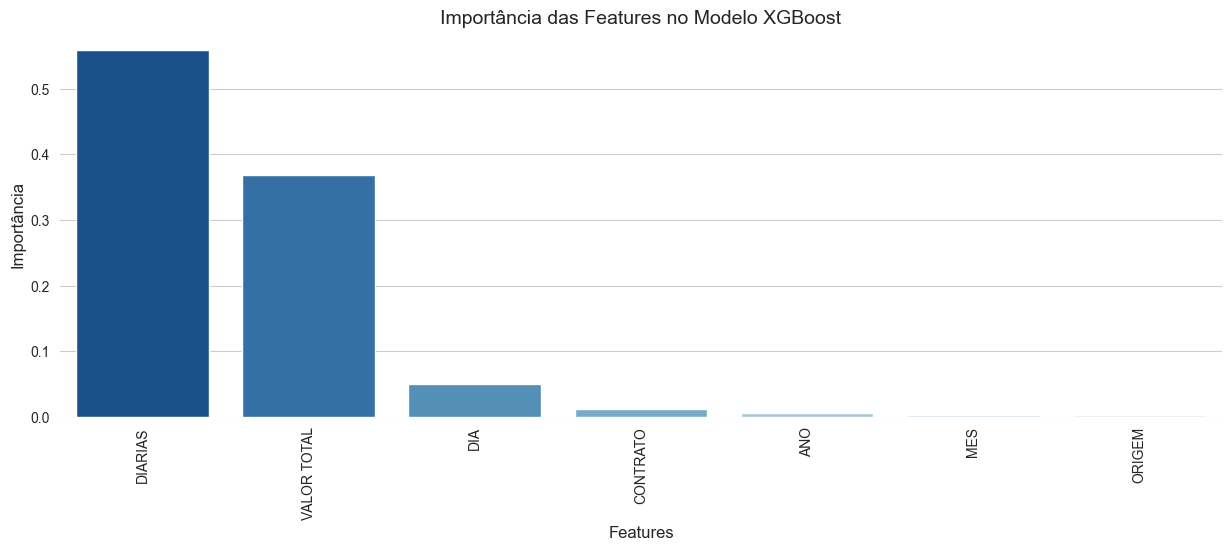

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando e treinando o modelo XGBoost
model = xgb.XGBRegressor()  # ou XGBClassifier() para classificação
model.fit(X, y)

# Obtém a importância das features
importancia_features = pd.DataFrame({
    'Feature': X.columns,
    'Importância': model.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Configuração do estilo do gráfico
sns.set_style("whitegrid")  # Remove linhas pretas do fundo

# Plot do gráfico de importância
plt.figure(figsize=(15, 5))
sns.barplot(x='Feature', y='Importância', data=importancia_features, palette="Blues_r")  # Azul
plt.title('Importância das Features no Modelo XGBoost', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância', fontsize=12)
plt.xticks(rotation=90)

# Remove a borda ao redor do gráfico
sns.despine(left=True, bottom=True)

plt.show()
